In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import svd
import fancyimpute
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eig
import missingno as mn
%matplotlib inline

Using TensorFlow backend.


In [3]:
combi = pd.read_csv("C:/Users/sivar/Desktop/Praxis/ML(Machine Learining)/Data/combined.csv")

In [4]:
combi.shape

(14204, 13)

In [5]:
combi.dtypes

Unnamed: 0                     int64
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
combi.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
combi.isnull().sum()

Unnamed: 0                      0
Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
combi_im=combi.iloc[:,[2,3,4,5,6,9,10,11,12]]

In [9]:
combi_im.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [10]:
combi_im.shape

(14204, 9)

In [11]:
combi_im['Outlet_Size'].fillna('Other', inplace = True)

C:\Users\sivar\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
combi_im = pd.get_dummies(combi_im)

In [13]:
combi_im.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_Medium,Outlet_Size_Other,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [14]:
combi_im.shape

(14204, 36)

In [15]:
Y = fancyimpute.MICE(verbose= False) #Mice Imputation

In [16]:
combi_im_mice = Y.complete(combi_im)

In [17]:
combi_im_mice = pd.DataFrame(combi_im_mice)

In [18]:
combi_im_mice.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,9.30,0.016047,249.8092,3735.1380,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,48.2692,443.4228,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,2097.2700,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,182.0950,732.3800,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,53.8614,994.7052,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [19]:
combi_im_mice.columns = combi_im.columns

In [20]:
combi_im_knn = fancyimpute.KNN(k=5).complete(combi_im)

Imputing row 1/14204 with 0 missing, elapsed time: 61.625
Imputing row 101/14204 with 0 missing, elapsed time: 61.722
Imputing row 201/14204 with 0 missing, elapsed time: 61.748
Imputing row 301/14204 with 1 missing, elapsed time: 61.787
Imputing row 401/14204 with 1 missing, elapsed time: 61.818
Imputing row 501/14204 with 0 missing, elapsed time: 61.861
Imputing row 601/14204 with 0 missing, elapsed time: 61.946
Imputing row 701/14204 with 1 missing, elapsed time: 61.966
Imputing row 801/14204 with 0 missing, elapsed time: 61.999
Imputing row 901/14204 with 1 missing, elapsed time: 62.023
Imputing row 1001/14204 with 1 missing, elapsed time: 62.051
Imputing row 1101/14204 with 1 missing, elapsed time: 62.075
Imputing row 1201/14204 with 0 missing, elapsed time: 62.101
Imputing row 1301/14204 with 0 missing, elapsed time: 62.125
Imputing row 1401/14204 with 0 missing, elapsed time: 62.147
Imputing row 1501/14204 with 0 missing, elapsed time: 62.178
Imputing row 1601/14204 with 0 missi

Imputing row 14201/14204 with 0 missing, elapsed time: 62.630


In [21]:
combi_im_knn = pd.DataFrame(combi_im_knn) # KNN imputation 

In [22]:
combi_im_knn.columns = combi_im.columns

In [23]:
combi_im_knn.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_Medium,Outlet_Size_Other,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,48.2692,443.4228,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,2097.2700,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,182.0950,732.3800,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,53.8614,994.7052,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
combi_im_mice['Item_Weight'].describe()

count    14204.000000
mean        12.791952
std          4.239060
min          4.555000
25%          9.300000
50%         12.698911
75%         16.000000
max         21.350000
Name: Item_Weight, dtype: float64

In [25]:
combi_im_knn['Item_Weight'].describe()

count    14204.000000
mean        12.780355
std          4.369254
min          4.555000
25%          9.100000
50%         12.600000
75%         16.250000
max         21.350000
Name: Item_Weight, dtype: float64

In [26]:
u,s,v = svd(combi_im_mice)

In [27]:
u_row = pd.DataFrame(u)

In [28]:
u_row.shape

(14204, 14204)

In [29]:
s_sin = pd.DataFrame(s)

In [30]:
s_sin.shape

(36, 1)

In [31]:
v_col = pd.DataFrame(v)

In [32]:
v_col.shape

(36, 36)

In [33]:
combi_svd =(np.dot(u[:10000,:2],np.diag(s[:2])))

In [34]:
combi_svd1 = pd.DataFrame(combi_svd)

In [35]:
combi_svd1.shape

(10000, 2)

In [36]:
x = combi_svd1.iloc[:,0]
y = combi_svd1.iloc[:,1]

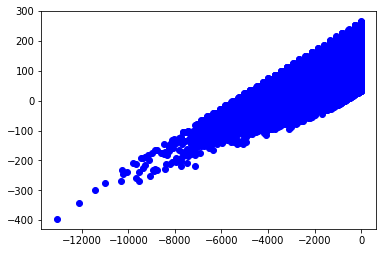

In [37]:
plt.scatter(x,y,c='blue')

In [38]:
combi_cl = combi_im_mice.iloc[:,[0,2]]

In [39]:
combi_cl.head(n=2)

,Item_Weight,Item_MRP
0,9.30,249.8092
1,5.92,48.2692


In [40]:
x1 = combi_cl.iloc[:500,0]
y1 = combi_cl.iloc[:500,1]

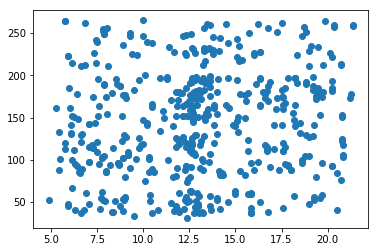

In [41]:
plt.scatter(x1,y1)

In [42]:
X = []
for i in range (1,10):
    km = KMeans (n_clusters=i,n_init=50)
    s = km.fit(combi_cl).inertia_
    X.append(s)

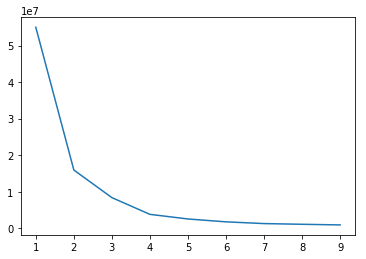

In [43]:
plt.plot(range(1,10),X)

In [44]:
combi_cl_a = np.array(combi_cl)

In [45]:
km = KMeans(n_clusters=4,n_init=50)

In [46]:
fit = km.fit(combi_cl_a)

In [47]:
fit.cluster_centers_

array([[  12.93925052,  169.70488248],
       [  12.65970832,   52.55149891],
       [  12.91403397,  237.11366317],
       [  12.63404897,  107.17447631]])

In [48]:
silhouette_score(X=combi_cl,labels=fit.labels_)

0.5943320767847371

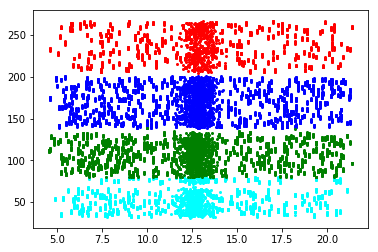

In [49]:
s = 4
plt.scatter(combi_cl_a[fit.labels_==0,0],combi_cl_a[fit.labels_==0,1],c='blue',s=s)
plt.scatter(combi_cl_a[fit.labels_==1,0],combi_cl_a[fit.labels_==1,1],c='cyan',s=s)
plt.scatter(combi_cl_a[fit.labels_==2,0],combi_cl_a[fit.labels_==2,1],c='red',s=s)
plt.scatter(combi_cl_a[fit.labels_==3,0],combi_cl_a[fit.labels_==3,1],c='green',s=s)
plt.show()

In [50]:
combi_pca = combi_im_mice.iloc[:,[0,1,2,3]]

In [51]:
combi_pca.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [52]:
pca = PCA(n_components=2)

In [53]:
combi_p = pca.fit_transform(combi_pca)

In [54]:
pca.explained_variance_

array([ 2888697.70548241,     3401.17285255])

In [55]:
combi_p

array([[ 2427.04592961,    78.3696399 ],
       [ -866.937748  ,   -81.88713592],
       [  787.95054504,    -9.25705216],
       ..., 
       [-1308.44187466,    -5.86128354],
       [-1307.23939255,    90.02077388],
       [-1308.93026397,   -44.8072567 ]])

In [56]:
A = []
for k in range (1,10):
    km = KMeans(n_clusters=k,n_init=50)
    a = km.fit(combi_p).inertia_
    A.append(a)

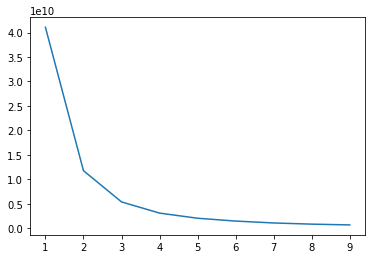

In [57]:
plt.plot(range(1,10),A)

In [58]:
km = KMeans(n_clusters=3,n_init=50)

In [59]:
pc = km.fit(combi_p)

In [60]:
pc.cluster_centers_

array([[  1.00282767e+03,  -6.47600952e+00],
       [ -1.08905986e+03,   8.68864358e-01],
       [  3.81887199e+03,   1.23649392e+01]])

In [61]:
silhouette_score(X=combi_p,labels=fit.labels_)

-0.20599979673480392

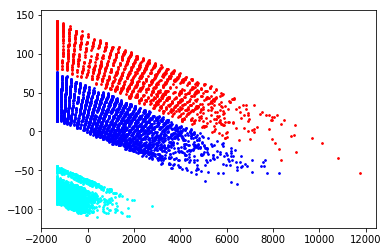

In [62]:
s = 3
plt.scatter(combi_p[fit.labels_==0,0],combi_p[fit.labels_==0,1],c='blue',s=s)
plt.scatter(combi_p[fit.labels_==1,0],combi_p[fit.labels_==1,1],c='cyan',s=s)
plt.scatter(combi_p[fit.labels_==2,0],combi_p[fit.labels_==2,1],c='red',s=s)

In [63]:
s = np.array([[1,2],[3,4],[5,6]])
b = np.array([0,1,2])

In [64]:
s[b==0,1]

array([2])

In [65]:
img = plt.imread("C:/Users/sivar/OneDrive/Desktop/DSC_0464.png")

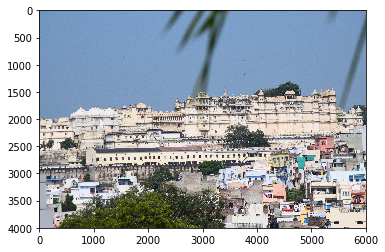

In [66]:
plt.imshow(img)

In [67]:
img.shape

(4000, 6000, 4)

In [68]:
img_new = img[:,:,0]

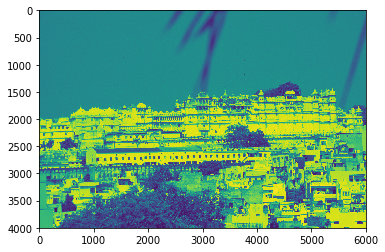

In [69]:
plt.imshow(img_new)

In [70]:
U,S,V = svd(img_new)

In [71]:
img_svd = np.dot(np.dot(U[:,:50],np.diag(S[:50])),V[:50,:])

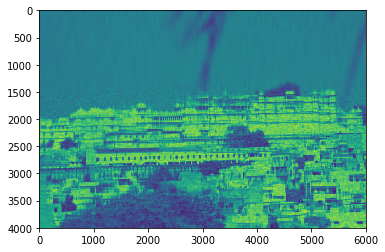

In [72]:
plt.imshow(img_svd)

In [73]:
img_svd.shape

(4000, 6000)

In [74]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [75]:
link_single = linkage(y=combi_im_mice,method='single')

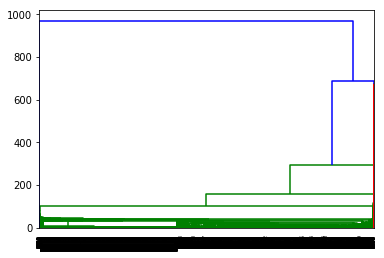

In [77]:
link_complete = linkage(y=combi_im_mice,method='complete')

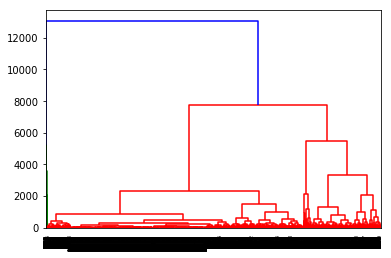

In [78]:
plt.show(dendrogram(link_complete))

In [79]:
link_group = linkage(y=combi_im_mice,method='average')

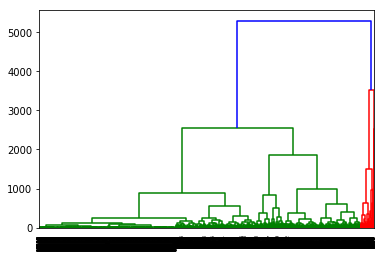

In [80]:
#plt.figure(figsize = (20,10))
plt.show(dendrogram(link_group))


In [81]:
link_ward = linkage(y=combi_im_mice, method = 'ward' )

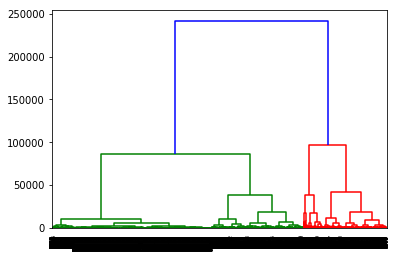

In [82]:
#plt.figure(figsize=(20,10))
plt.show(dendrogram(link_ward))

In [83]:
cut_s = cut_tree(link_single,height=400)

In [84]:
Cut_s = pd.DataFrame(cut_s)

In [85]:
Cut_s[0].value_counts()

0    14200
4        1
3        1
2        1
1        1
Name: 0, dtype: int64

In [86]:
cut_C = cut_tree(link_complete,height=2000)

In [87]:
Cut_C = pd.DataFrame(cut_C)

In [88]:
Cut_C[0].value_counts()

1     7791
2     3085
4     1739
0      707
3      481
5      257
7       86
6       42
8       12
10       2
9        2
Name: 0, dtype: int64

In [89]:
cut_a = cut_tree(link_group,height=2000)

In [90]:
Cut_a = pd.DataFrame(cut_a)

In [91]:
Cut_a[0].value_counts()

1    9220
0    4436
2     518
3      26
4       4
Name: 0, dtype: int64

In [92]:
cut_m = cut_tree(link_ward,height=60000)

In [93]:
Cut_m = pd.DataFrame(cut_m)

In [94]:
Cut_m[0].value_counts()

1    6774
2    3914
0    2697
3     819
Name: 0, dtype: int64

In [95]:
Cut_m.head()

,0
0,0
1,1
2,2
3,2
4,2


In [96]:
combi_im_mice.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_Medium,Outlet_Size_Other,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,48.2692,443.4228,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,2097.2700,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,182.0950,732.3800,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,53.8614,994.7052,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [97]:
combi_im_mice['Clusters'] = Cut_m

In [98]:
combi_im_mice.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_Other,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Clusters
0,9.30,0.016047,249.8092,3735.1380,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,5.92,0.019278,48.2692,443.4228,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2,17.50,0.016760,141.6180,2097.2700,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
3,19.20,0.000000,182.0950,732.3800,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
4,8.93,0.000000,53.8614,994.7052,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2


In [99]:
Cluster_0 = combi_im_mice[combi_im_mice['Clusters']==0]

In [100]:
Cluster_0.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_Other,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Clusters
0,9.300000,0.016047,249.8092,3735.1380,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7,12.628783,0.127470,107.7622,4022.7636,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
11,18.500000,0.045464,144.1102,2187.1530,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
18,12.577729,0.034238,113.2834,2303.6680,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
19,13.350000,0.102492,230.5352,2748.4224,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [101]:
Cluster_0.shape

(2697, 37)

In [102]:
#Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [104]:
data = pd.read_csv('C:/Users/sivar/Desktop/Praxis/ML(Machine Learining)/Data/Adult_d.csv')

In [105]:
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,country,Target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [106]:
data.shape

(23, 9)

In [107]:
model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [108]:
data.Target.value_counts()

 <=50K    12
 >50K      6
Name: Target, dtype: int64

In [109]:
data['Target'] = data['Target'].replace([' <=50K'],0)
data['Target'] = data['Target'].replace([' >50K'],1)

In [110]:
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,country,Target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0.0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0.0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0.0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0.0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0.0


In [111]:
data1 = pd.get_dummies(data)

In [112]:
data1.shape

(23, 46)

In [113]:
data_known = data1[~data1.Target.isnull()]
data_unknown = data1[data1.Target.isnull()]

In [114]:
model_tree.fit(X=data_known.drop('Target',axis=1),y=data_known['Target'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

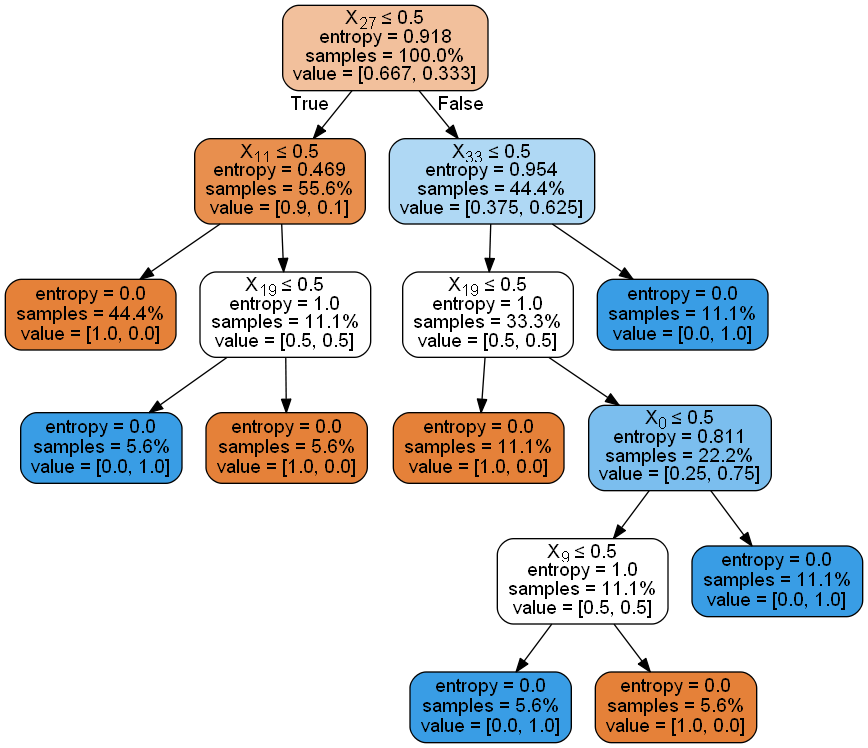

In [115]:
dot_data = StringIO()

export_graphviz(model_tree, out_file=dot_data,
               filled= True,rounded = True,
               special_characters=True, proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
A = ['workclass','education','marital-status','occupation','relationship','race','sex','country']
le = LabelEncoder()
for i in A:
    data[i]=le.fit_transform(data[i])

In [126]:
data.shape

(23, 9)

In [119]:
data_known1 = data[~data.Target.isnull()]
data_unknown1 = data[data.Target.isnull()]

In [120]:
model_tree1 = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [121]:
model_tree1.fit(X=data_known1.drop('Target',axis=1),y=data_known1['Target'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [122]:
data.shape

(23, 9)

In [123]:
data_known1.shape

(18, 9)

In [124]:
data_unknown1.shape

(5, 9)

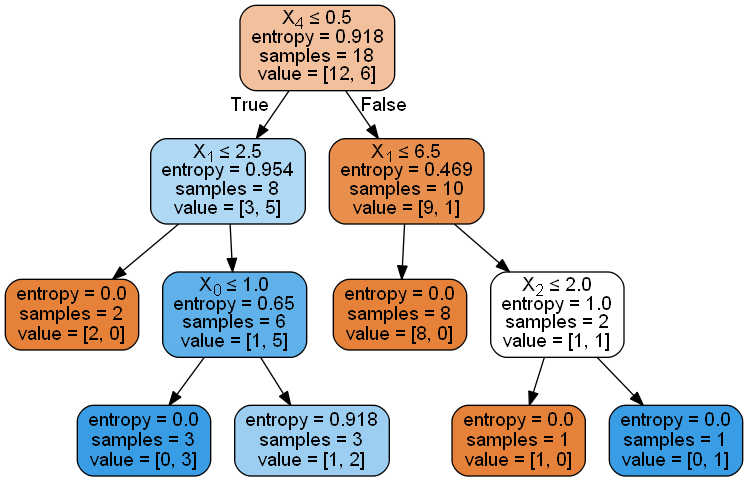

In [125]:
dot_data1 = StringIO()

export_graphviz(model_tree1, out_file=dot_data1,
               filled= True,rounded = True,
               special_characters=True, proportion=False)

graph1 = pydotplus.graph_from_dot_data(dot_data1.getvalue())
Image(graph1.create_png())